__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/bludwig/blob/main/jupyter/30_Train_Any_Dataset/_Train_Any_Dataset.ipynb)__

In [22]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install --quiet blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /home/me/Dropbox
environment['lib_path']     = /home/me/Dropbox/31_Projekte/01_Python/libs
Start Time: 17:59:03


# Train Any Dataset

In [23]:
# Settings

#dataset_name    = 'adult_census_income'   # Which dataset shall be loaded?
dataset_name    = 'iris'                  # Which dataset shall be loaded?
experiment_name = 'iris'                  # Base of the model names
mode            = 'T'                     # mode: C=cleanup, T=train, S=show 
verbose         = False    
predicts_size   = 100                     # How many predictions should be created?

gdrive_base   = 'drive/MyDrive/Colab'
bgc('Beige')

In [24]:
# Colab? >> Install the latest version of Ludwig
if environment['in_colab']:
  !pip uninstall -y tensorflow --quiet
  !python -m pip install git+https://github.com/ludwig-ai/ludwig.git --quiet 
  !pip install ptitprince --quiet 
  !pip install bludwig --quiet 

In [4]:
# cleanup?
if mode == 'C': 
    try:
        !rm -rf results
        !rm *.meta.json
        !rm *.hdf5    
        !rm *.temp.pickle        
        !rm .lock_preprocessing
        !rm train_log*.csv
        !rm datasets.csv        
    except:
        pass
 

if mode == 'C':
    raise Stop
else:
    bgc('WhiteSmoke')

Stop Time:  16:39:15
Elapsed:    2 secs


In [26]:
# import 
import pandas as pd
import pandasklar as pak
grid = pak.grid
import bludwig

## Data

In [27]:
# load_dataset
data_df, dataset_loader = bludwig.load_dataset(dataset_name)


iris 1.0
Iris Dataset
https://archive.ics.uci.edu/ml/datasets/Iris

output_features: [{'name': 'class', 'type': 'category'}]


In [28]:
# examine
print(data_df.shape[0], 'records for training, validation and test')
pak.sample(data_df,10)

149 records for training, validation and test


,class,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.6,3.1,1.5,0.2
3,Iris-setosa,5.0,3.6,1.4,0.2
12,Iris-setosa,4.3,3.0,1.1,0.1
14,Iris-setosa,5.7,4.4,1.5,0.4
21,Iris-setosa,4.6,3.6,1.0,0.2
60,Iris-versicolor,5.9,3.0,4.2,1.5
99,Iris-virginica,6.3,3.3,6.0,2.5
117,Iris-virginica,7.7,2.6,6.9,2.3
130,Iris-virginica,7.9,3.8,6.4,2.0


In [29]:
# analyse_cols
analyse = bludwig.analyse_cols(data_df, dataset_loader)
analyse

,col_name,is_output_feature,feature_type,datatype_short,datatype_identified,mem_usage,nunique,ndups,vmin,vmax,n
0,class,True,category,string,string,700,3,146,Iris-setosa,Iris-virginica,149
1,sepal_length_cm,False,number,float32,float,40,35,114,4.3,7.9,149
2,sepal_width_cm,False,number,float32,float,40,23,126,2.0,4.4,149
3,petal_length_cm,False,number,float32,float,40,43,106,1.0,6.9,149
4,petal_width_cm,False,number,float32,float,40,22,127,0.1,2.5,149


## configs

In [30]:
# Automatically generated / provided configs
configs = bludwig.configs(data_df, dataset_loader)

for i, c in enumerate(configs):
    print('\n====== config for model {} ======\n'.format( experiment_name + '_' + str(i)))
    print(c)
    print('\n\n')


====== config for model iris_0 ======

input_features:
- name: sepal_length_cm
  type: number
- name: sepal_width_cm
  type: number
- name: petal_length_cm
  type: number
- name: petal_width_cm
  type: number
output_features:
- name: class
  type: category






## Initialize

In [31]:
# bludwig initialize
if mode == 'T':  
    ludwig_job = bludwig.LudwigJob( configs=configs, experiment_name=experiment_name, verbose=verbose) 


1 configs loaded


In [32]:
# bludwig initialize and load
if mode == 'S':  
    ludwig_job = bludwig.LudwigJob() 
    ludwig_job.load_from_results()
    #print(ludwig_job)

## Train

In [33]:
# train and evaluate
out = None
if mode == 'T':  
    ludwig_job.experiment(data_df)
    out = bludwig.train_log_to_csv( ludwig_job.train_log )
else:
    out = 'No training'
out


Training model iris_0
train_time: 2 secs



,name,iris_0
0,accuracy,0.703
1,roc_auc,0.71
2,loss,1.02
3,epochs,6
4,time/epoch,0.3 secs
5,train_time,2 secs


## Evaluate

[{'class': {'loss': 1.0219457149505615, 'roc_auc': 0.7097963690757751, 'accuracy': 0.7025641202926636, 'accuracy_micro': 0.6333333253860474}}]


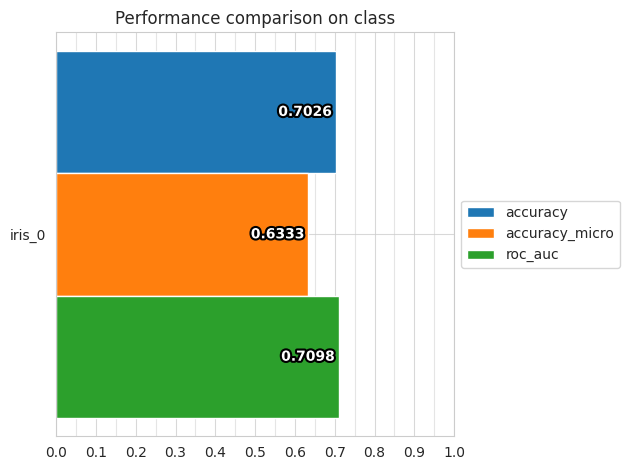

In [34]:
# compare_performance
ludwig_job.compare_performance()

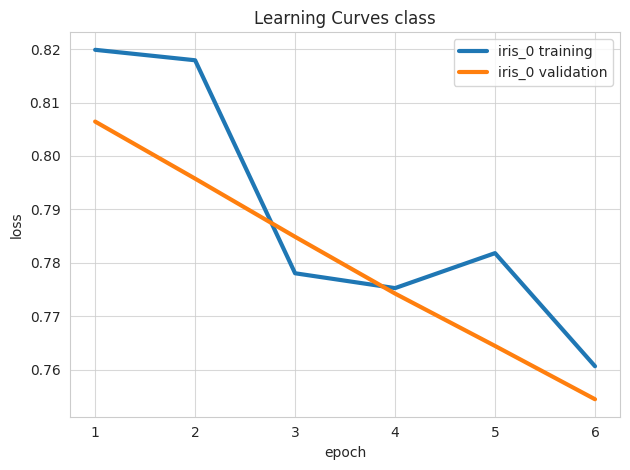

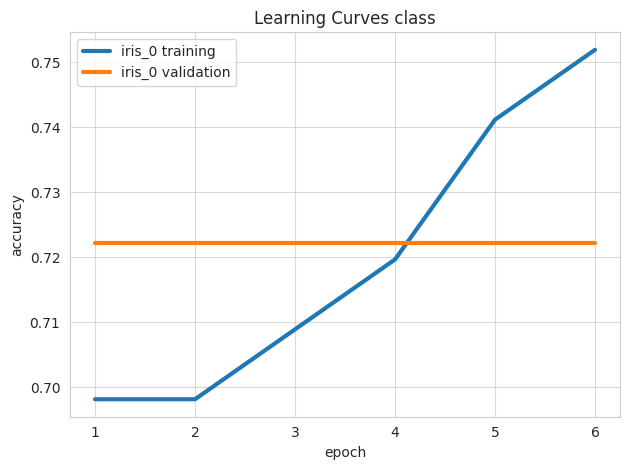

In [35]:
# learning_curves
ludwig_job.learning_curves()

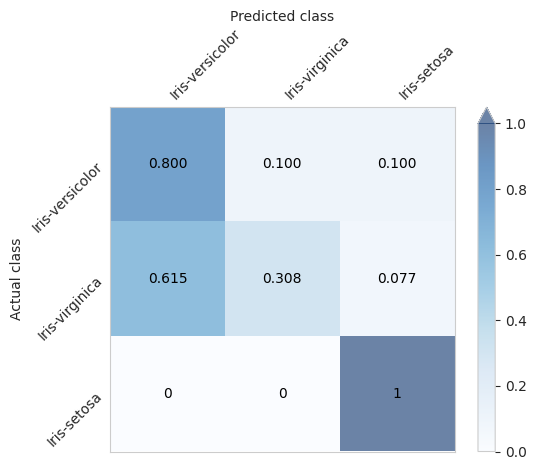

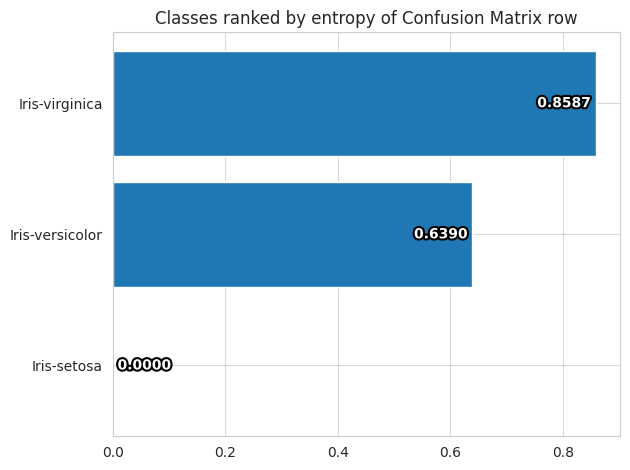

In [36]:
# confusion_matrix
#ludwig_job.load_model(0)
ludwig_job.confusion_matrix()

In [37]:
# roc_curves
ludwig_job.roc_curves()

No roc_curve found


## print_models

In [38]:
# print 
print(ludwig_job)

LudwigJob object
        experiment_name:     iris
        output_feature_name: class
        train_jobs:          [0]
        model_names:         ['iris_0']
        model_paths:         ['/home/me/Dropbox/31_Projekte/01_Python/git/bludwig/jupyter/30_Train_Any_Dataset/results/iris_0_run/model']        
        output_dirs:         ['/home/me/Dropbox/31_Projekte/01_Python/git/bludwig/jupyter/30_Train_Any_Dataset/results/iris_0_run']
        model_no:            0   
        cuda:                True             
        


In [39]:
ludwig_job.print_models()

### iris_0 ###
Layer (type:depth-idx)                        Input Shape               Output Shape              Param #                   Trainable
ECD                                           [2]                       [2, 4]                    --                        True
├─LudwigFeatureDict: 1-1                      --                        --                        --                        --
│    └─ModuleDict: 2-1                        --                        --                        --                        --
│    │    └─NumberInputFeature: 3-1           [2]                       [2, 1]                    --                        --
│    │    │    └─PassthroughEncoder: 4-1      [2, 1]                    [2, 1]                    --                        --
│    │    └─NumberInputFeature: 3-2           [2]                       [2, 1]                    --                        --
│    │    │    └─PassthroughEncoder: 4-2      [2, 1]                    [2, 1]         

## Predict

In [40]:
# load_model
predict_model = len(configs)-1
print('predict_model:',predict_model)
ludwig_job.load_model(predict_model)

# data
data_sample = pak.sample(data_df, predicts_size)

# predict
data_sample = ludwig_job.predict(data_sample)
data_sample

predict_model: 0


,class,class_pred,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_prob,class_prob,class_prob_Iris-versicolor,class_prob_Iris-virginica,class_prob_Iris-setosa
0,Iris-setosa,Iris-setosa,4.9,3.0,1.4,0.2,"[0.2176058441400528, 0.3319335877895355, 0.450...",0.450461,0.217606,0.331934,0.450461
2,Iris-setosa,Iris-setosa,4.6,3.1,1.5,0.2,"[0.11481817811727524, 0.3134516179561615, 0.57...",0.571730,0.114818,0.313452,0.571730
3,Iris-setosa,Iris-setosa,5.0,3.6,1.4,0.2,"[0.0549631267786026, 0.22532688081264496, 0.71...",0.719710,0.054963,0.225327,0.719710
4,Iris-setosa,Iris-setosa,5.4,3.9,1.7,0.4,"[0.038661081343889236, 0.19573058187961578, 0....",0.765608,0.038661,0.195731,0.765608
5,Iris-setosa,Iris-setosa,4.6,3.4,1.4,0.3,"[0.050444696098566055, 0.28779909014701843, 0....",0.661756,0.050445,0.287799,0.661756
...,...,...,...,...,...,...,...,...,...,...,...
141,Iris-virginica,Iris-virginica,5.8,2.7,5.1,1.9,"[0.3931487798690796, 0.4126269221305847, 0.194...",0.412627,0.393149,0.412627,0.194224
144,Iris-virginica,Iris-versicolor,6.7,3.0,5.2,2.3,"[0.4539395272731781, 0.4117247462272644, 0.134...",0.453940,0.453940,0.411725,0.134336
146,Iris-virginica,Iris-versicolor,6.5,3.0,5.2,2.0,"[0.4545145630836487, 0.35317176580429077, 0.19...",0.454515,0.454515,0.353172,0.192314
147,Iris-virginica,Iris-virginica,6.2,3.4,5.4,2.3,"[0.13322727382183075, 0.49003303050994873, 0.3...",0.490033,0.133227,0.490033,0.376740


## Colab: Copy back

In [41]:
if not environment['in_colab']:
    raise Stop

Stop Time:  17:59:08
Elapsed:    5 secs


In [ ]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [ ]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [ ]:
if environment['in_colab']:
    !ls

In [ ]:
if environment['in_colab']:
    !ls results

In [ ]:
# results: copy to GDrive
if environment['in_colab']:
  results_path = gdrive_base + '/results'
  !cp -a results $results_path 
  !cp train_log*.csv $gdrive_base 

In [ ]:
if environment['in_colab']:
    print('Copy back manually:')
    print('1) This ipynb-File, if changed')
    print('2) results directory')
    print('3) train_log file')    
else:
    print('finished')

In [ ]:
raise Stop